In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [32]:
# import data from Github
df = pd.read_csv(r'https://raw.githubusercontent.com/koen-d-r/kaggle_segmenting_mall_customers/master/Mall_Customers.csv', index_col=0)

# and check head
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
# check for empty fields
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# explore data
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
# check data in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


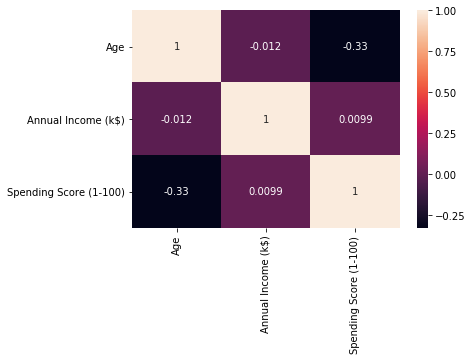

In [5]:
# check for any correlations
sns.heatmap(df.corr(), annot=True)

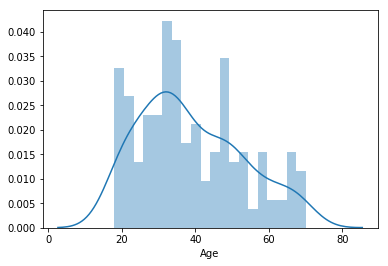

In [9]:
# plot the data in a simple histogram
sns.distplot(df['Age'], bins=20)

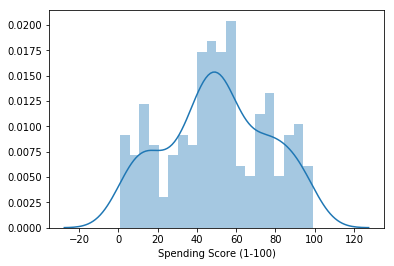

In [10]:
# plot the data in a simple histogram
sns.distplot(df['Spending Score (1-100)'], bins=20)

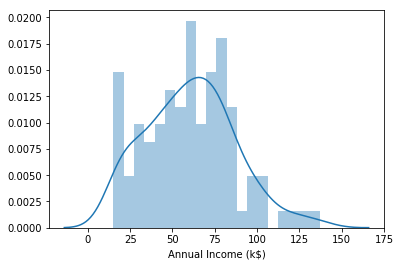

In [11]:
# plot the data in a simple histogram
sns.distplot(df['Annual Income (k$)'], bins=20)

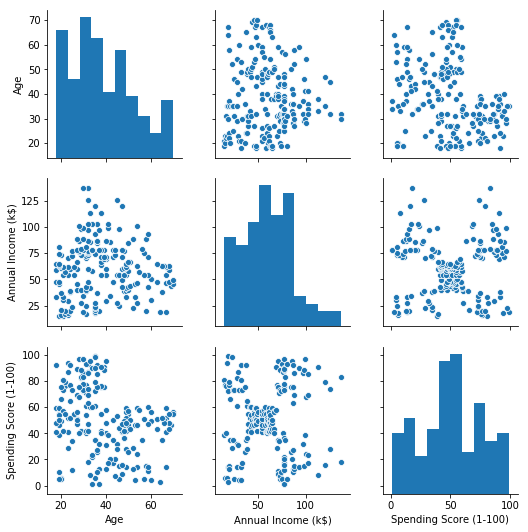

In [12]:
# check for any correlations in the data
sns.pairplot(df)

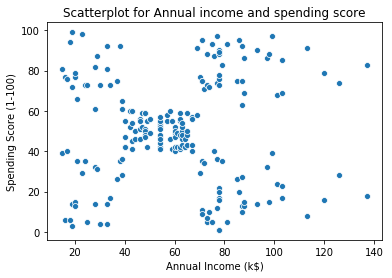

In [13]:
# investigate further on the ratios between annual income and spending score
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Scatterplot for Annual income and spending score')
plt.show()

In [14]:
# calculate z-scores for column "Annual Income (k$)"
df['Annual Income (k$) standarized'] = (df['Annual Income (k$)'] - df['Annual Income (k$)'].mean()) / df['Annual Income (k$)'].std()

In [15]:
# first check if income is distributed normally
len(df[(df['Annual Income (k$) standarized'] > -1)&(df['Annual Income (k$) standarized'] < 1)]) / len(df)

0.65

In [16]:
# second check if income is distributed normally
len(df[(df['Annual Income (k$) standarized'] > -2)&(df['Annual Income (k$) standarized'] < 2)]) / len(df)

0.97

In [17]:
# third check if income is distributed normally
len(df[(df['Annual Income (k$) standarized'] > -3)&(df['Annual Income (k$) standarized'] < 3)]) / len(df)

1.0

In [18]:
# income data seems to be roughly normally distributed

In [24]:
# check for best number of clusters with elbow method
elbow_method = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    elbow_method.append(kmeans.inertia_)

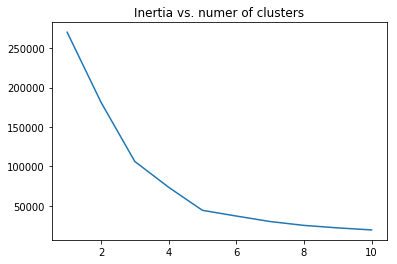

In [52]:
# plot inertia vs. number of clusters
plt.plot(range(1,11), elbow_method)
plt.title('Inertia vs. numer of clusters')
plt.show()

In [26]:
# refit KMeans clustering with n_clusters = 5
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
kmeans.inertia_

44448.45544793371

In [27]:
# calculate cluster for every customer
clustered_customers = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [33]:
# check result
clustered_customers

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [40]:
# put clustered_customers in pandas dataframe
df_clustered_customers = pd.DataFrame(clustered_customers, columns = ['cluster'], index = range(1,(len(clustered_customers)+1)))

In [41]:
# concatenate both files over axis 1
df = pd.concat([df, df_clustered_customers], axis=1)

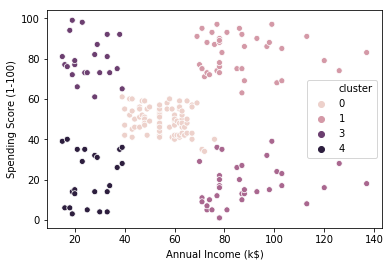

In [51]:
# plot results in scatterplot
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue = df['cluster'])

In [ ]:
# Five distinct groups can be determined for our mall customers. The most valuable customers are the one in the right 
# top corner with high annual incomes and a high spending scores